In [8]:
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib
import numpy as np
import glob
import os
import math
from os import listdir
import data_visualization as dv
import dill
import scipy 
from scipy.stats import norm
from scipy import stats
from tqdm import tqdm 
import random
import sys

wheel = dv.ColorWheel()

In [9]:
from plot_functions import *
from Subject_Object import *

# Initial Thangs

In [10]:
plt.style.use('cashaback_dark')
wheel = dv.ColorWheel()

# Initial thangs
os.chdir('D:\\Subject_Data\\Seth_MatchPennies_Agent_Exp1')
PATH = os.getcwd()
SAVE_PATH = r'C:\Users\Seth Sullivan\OneDrive - University of Delaware - o365\Desktop\MatchPennies-Agent-Expirement\Group_Figures\Exp1\\'
if not os.path.exists(SAVE_PATH):
    os.makedirs(SAVE_PATH)

# Fields pull and pull list
os.chdir('D:\Subject_Data\Seth_MatchPennies_Agent_Exp1')
PATH = os.getcwd()
figures_pull_list = []
figures_pull_list_control = []
figures_pull_list_task = []
fields_pull = []
with open(PATH+"\\Figures_Pull_List.txt", "r") as pull_file:
    figures_pull_list = pull_file.read().splitlines()
with open(PATH+"\\Fields_Pull.txt", "r") as fields_pull:
    fields_pull = fields_pull.read().splitlines()
num_subjects = len(figures_pull_list)

task_name = 'Seth_MatchPennies_Agent_Exp1'
tp3_title = "1000 (50)"
tp4_title = "1000 (150)"
tp5_title = '1100 (50)'
tp6_title = "1100 (150)"
tp7_title = "1200 (50)"
tp8_title = '1200 (150)'
trial_block_titles = [tp3_title, tp4_title, tp5_title,tp6_title, tp7_title, tp8_title]
num_blocks = len(trial_block_titles)


num_subjects

16

# Pickle Objects

In [11]:
load_path = r'D:\Subject_Data\Seth_MatchPennies_Agent_Exp1\Subjects_Analyzed\\'
subject = dill.load((open(load_path + 'subject_object_dict.pkl', 'rb')))
group = dill.load((open(load_path + 'group_object.pkl', 'rb')))

# Set Save 

In [12]:
save = False

# Histograms

# Box Plots

Decision Times

In [13]:
group.combine_all_subjects('player_task_decision_time_first_half').shape

(16, 6, 40)

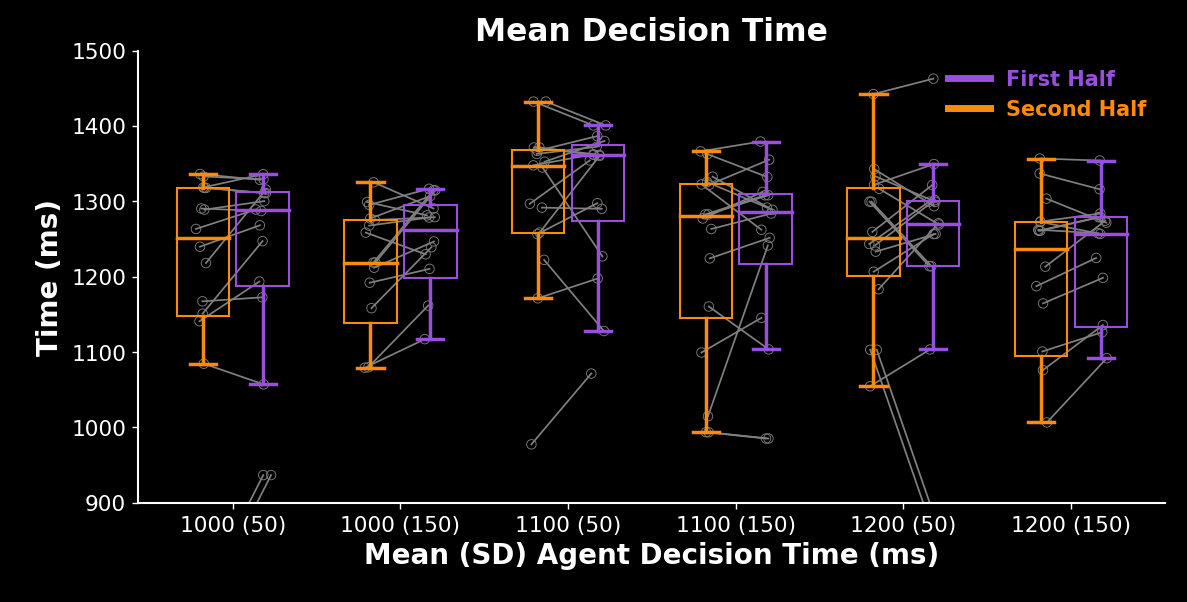

In [14]:
metric1 = group.combine_all_subjects('player_task_decision_time_first_half_mean') 
metric2 = group.combine_all_subjects('player_task_decision_time_second_half_mean') 

w,h = 12,6
axmain,ax = make_figure_panel(figsize=(w,h),inset_size=(1.3,0.9,w-1.4,h-1.3))
xlocs = np.linspace(0,w,num=len(trial_block_titles))
ylocs = np.arange(900,1600,100)
bw = 0.75
multi_boxplot(ax,metric1,xlocs=xlocs-bw/1.75,box_width = bw,colors = wheel.rak_orange)
multi_boxplot(ax,metric2,xlocs=xlocs+bw/1.75,box_width = bw,colors = wheel.purple)
for j in range(num_blocks):     
        m = np.array([xlocs[j],xlocs[j]])
        x_pos = m + np.array([-bw/1.75,bw/1.75])
        dv.jitter_array(ax=ax,x_positions=x_pos,data_list=[metric1[:,j],metric2[:,j]], noise_scale=0.05, include_mean = False, circle_size=30, linewidth = 1)

# dv.jitter_array(ax=ax,x_positions=xlocs-bw/1.75,data_list=metric1.T, noise_scale=0.01, include_mean = False, circle_size=30)
# dv.jitter_array(ax=ax,x_positions=xlocs+bw/1.75,data_list=metric2.T, noise_scale=0.01, include_mean = False, circle_size=30)

ax.set_xticks(xlocs),ax.set_yticks(ylocs)
ax.set_xticklabels(trial_block_titles)
ax.set_xlim(min(xlocs)-1.8*bw,max(xlocs)+1.8*bw), ax.set_ylim(min(ylocs),max(ylocs))

ax.set_xlabel('Mean (SD) Agent Decision Time (ms)')
ax.set_ylabel('Time (ms)')
ax.set_title('Mean Decision Time')

dv.Custom_Legend(ax,labels=['First Half','Second Half'],colors=[wheel.purple,wheel.rak_orange],fontsize=12)

axmain.set_axis_off()
plt.show()

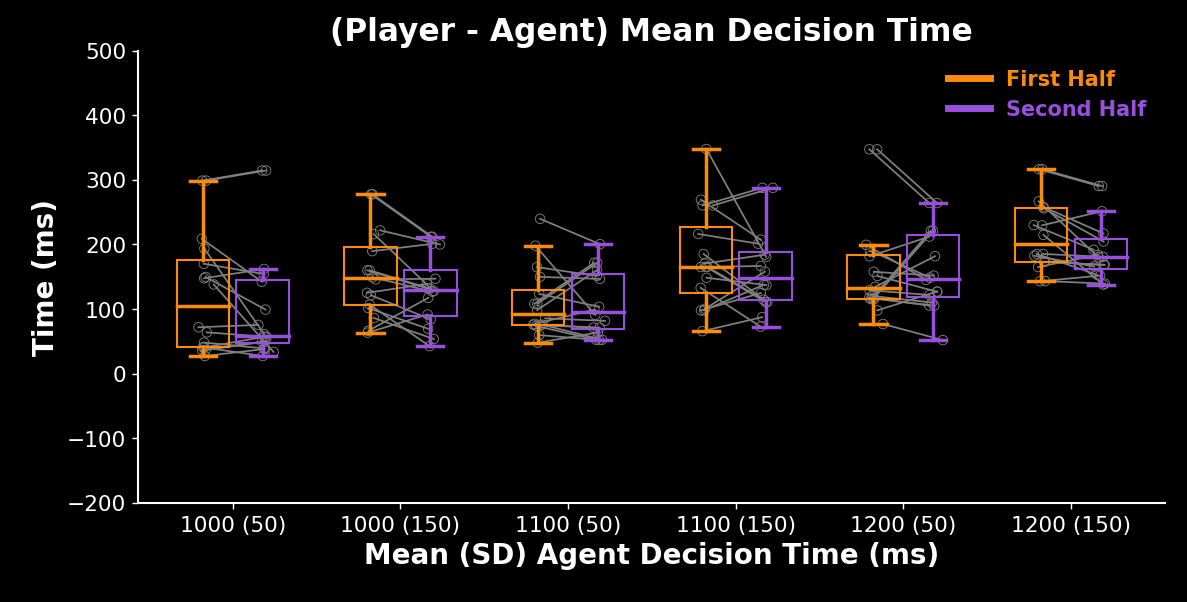

In [19]:
metric1 = group.combine_all_subjects('player_minus_agent_task_decision_time_first_half_mean') 
metric2 = group.combine_all_subjects('player_minus_agent_task_decision_time_second_half_mean') 

w,h = 12,6
axmain,ax = make_figure_panel(figsize=(w,h),inset_size=(1.3,0.9,w-1.4,h-1.3))
xlocs = np.linspace(0,w,num=len(trial_block_titles))
ylocs = np.arange(-200,600,100)
bw = 0.75
multi_boxplot(ax,metric1,xlocs=xlocs-bw/1.75,box_width = bw,colors = wheel.rak_orange)
multi_boxplot(ax,metric2,xlocs=xlocs+bw/1.75,box_width = bw,colors = wheel.purple)
for j in range(num_blocks):     
        m = np.array([xlocs[j],xlocs[j]])
        x_pos = m + np.array([-bw/1.75,bw/1.75])
        dv.jitter_array(ax=ax,x_positions=x_pos,data_list=[metric1[:,j],metric2[:,j]], noise_scale=0.05, include_mean = False, circle_size=30, linewidth = 1)

# dv.jitter_array(ax=ax,x_positions=xlocs-bw/1.75,data_list=metric1.T, noise_scale=0.01, include_mean = False, circle_size=30)
# dv.jitter_array(ax=ax,x_positions=xlocs+bw/1.75,data_list=metric2.T, noise_scale=0.01, include_mean = False, circle_size=30)

ax.set_xticks(xlocs),ax.set_yticks(ylocs)
ax.set_xticklabels(trial_block_titles)
ax.set_xlim(min(xlocs)-1.8*bw,max(xlocs)+1.8*bw), ax.set_ylim(min(ylocs),max(ylocs))

ax.set_xlabel('Mean (SD) Agent Decision Time (ms)')
ax.set_ylabel('Time (ms)')
ax.set_title('(Player - Agent) Mean Decision Time')

dv.Custom_Legend(ax,labels=['First Half','Second Half'],colors=[wheel.rak_orange,wheel.purple],fontsize=12)

axmain.set_axis_off()
plt.show()

In [22]:
group.combine_all_subjects('player_minus_agent_task_decision_time_mean')

array([[-143.29615402, -300.57116699,  317.98822861, -109.32619476,
        -210.5009964 , -432.69616165],
       [ 316.99060135,  242.65469131,  264.01885834,  210.67223812,
          56.84744568,   43.24108582],
       [ 263.9196991 ,  230.16824036,  213.96096191,   25.73754044,
         113.78079987,   46.00583496],
       [  63.86135788,   86.01847229,  -78.72235565,    4.97636642,
        -129.28286591,  -44.5380722 ],
       [ 288.76278534,  292.95964127,  259.77015839,  198.57636261,
          93.33941498,   62.20729218],
       [ 168.04794769,  120.45075378,   94.19192276,  211.28379211,
          29.69985352,  -73.49832458],
       [ 331.30983505,  267.05035629,  280.4341301 ,  278.37467041,
         252.76715165,  123.64119644],
       [ 210.31267776,  227.57856216,  194.39956055,   36.46613785,
          47.39117126, -117.57010574],
       [ 279.86368484,  271.60481873,  267.72737732,  243.90294189,
         139.03072357,  154.62104416],
       [ 288.46024399,  281.80848541,